Google Colab Notebook link:<br>
https://drive.google.com/file/d/1D9enKTYf0P3i-oSwTG-OGb-90T3tCV42/view?usp=sharing

# Homework 1 (Total 100 points)

#Homework 1

## Q1. Load and examine the `Auto.csv` dataset from the Blackboard course site. **(20 points total)**

  1. Should you drop any variable from regression analysis and why? (5 points)
  1. Which variables should be treated as numeric and which as categorical? Explain why. (5 points)

FYI column definitions (from https://cran.r-project.org/web/packages/ISLR/ISLR.pdf):
* mpg: miles per gallon (The outcome, or y, variable)
* cylinders: Number of cylinders between 4 and 8
* displacement: Engine displacement (cu. inches)
* horsepower: Engine horsepower
* weight: Vehicle weight (lbs.)
* acceleration: Time to accelerate from 0 to 60 mph (sec.)
* year: Model year (modulo 100)
* origin: Origin of car (1. American, 2. European, 3. Japanese)
* name: Vehicle name


In [31]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BA810/Data/Auto.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [34]:
# Noticed that horsepower is object and wanted to change it to float

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [35]:
# Checking name column unique values
len(df['name'].unique())

304

In [36]:
# Since it has many unique values which will not add to the regression model, I'll drop it
df.drop(columns=['name'], inplace=True)

In [37]:
# To ensure that name column was actually dropped
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


# A1.
1.
I've dropped name column from regression because it consists of many unique values that will not contribute to the regression model
<br>
2.<br>
`Numeric Variables :` <br>
    it's continous changing variables which differ from one to another, such as:
*   mpg
*   displacement
*   horsepower
*   weight
*   acceleration
<br>

`Categorical Variables :` <br>
    the value it represent falls into certain categories even though some of them contain numeric values it's still within fixed categories, such as:
*   cylinders
*   year
*   origin

## Q2. Scatter and explore. **(20 points total)**
1. Plot all the pairwise scatter plots and histograms for the numeric features. (10 points)
1. Discuss two interesting relationships that you notice. (10 points)

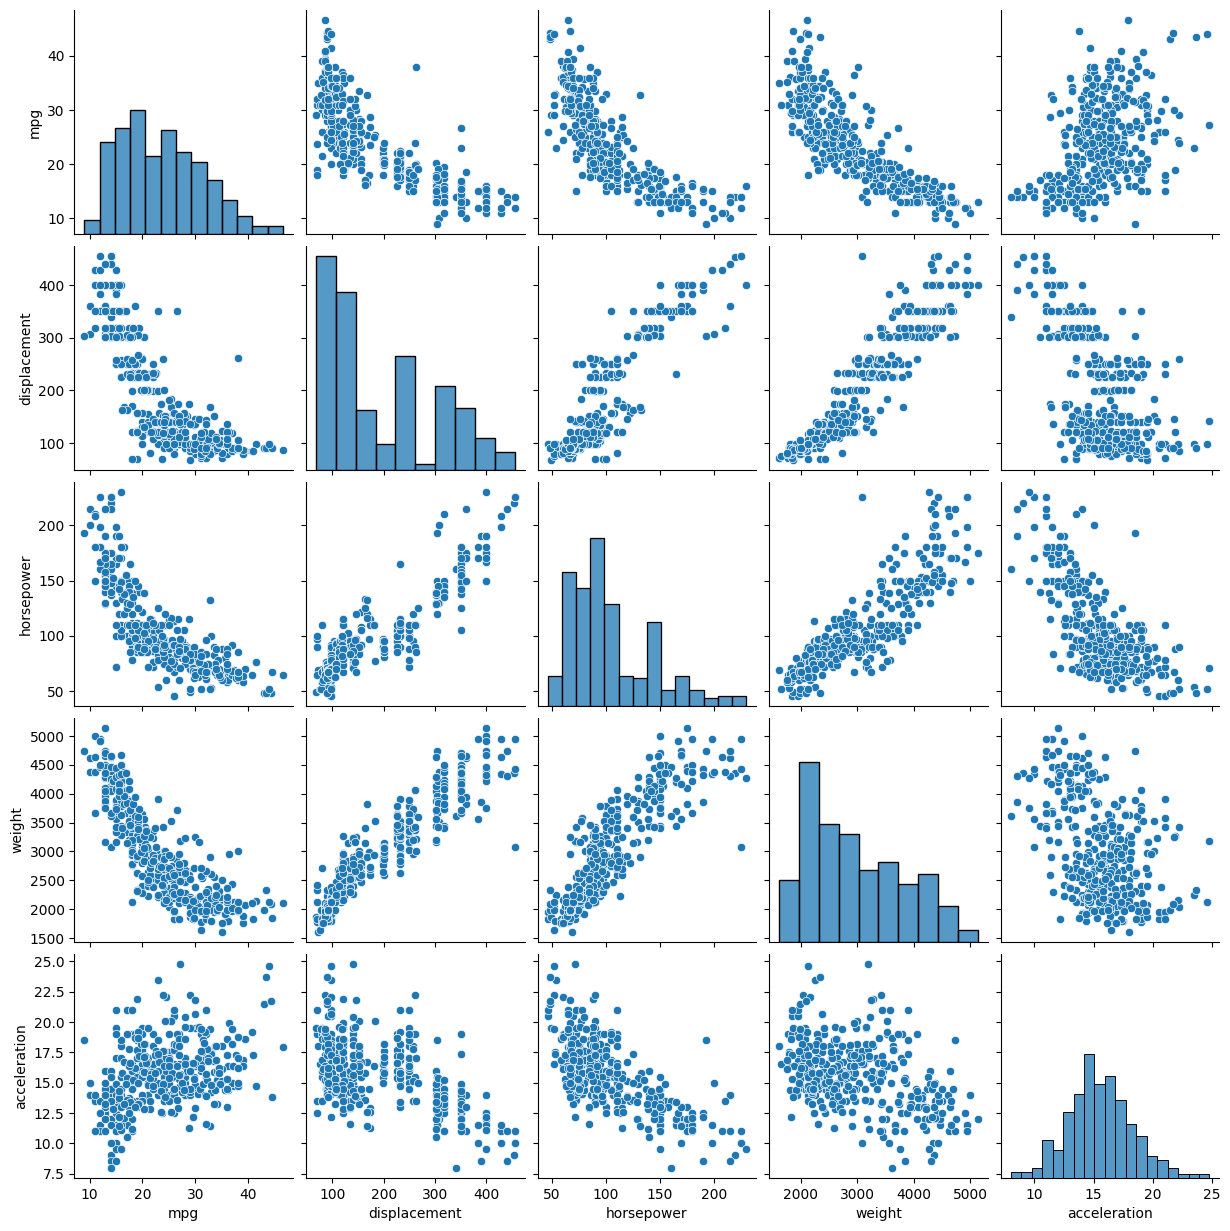

In [38]:
numeric_variables = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

sns.pairplot(df[numeric_variables])
plt.show()

## A2.
*   **mpg vs. weight:**<br>
There's a clear negative correlation between these two variables. As the weight of the vehicle increases, the mpg (fuel efficiency) tends to decrease. This relationship is consistent with the expectation that heavier vehicles generally consume more fuel than lighter ones.

*   **horsepower vs. mpg:**<br>
There's a negative correlation, cars with higher horsepower generally have lower fuel efficiency.


These relationships highlight important considerations in vehicle design and marketing. Fuel efficiency (mpg) is a crucial factor for many consumers, and these plots underscore the trade-offs between power (as indicated by weight and horsepower) and fuel economy.

## Q3. Compute the correlation matrix among the numeric variables. Discuss one interesting correlation. (5+5=**10 points total**)

In [39]:
# To create the correlation matrix for numeric variables

corr_matrix = df[numeric_variables].corr(numeric_only=True)
print(corr_matrix)

                   mpg  displacement  horsepower    weight  acceleration
mpg           1.000000     -0.804443   -0.778427 -0.831739      0.422297
displacement -0.804443      1.000000    0.897257  0.933104     -0.544162
horsepower   -0.778427      0.897257    1.000000  0.864538     -0.689196
weight       -0.831739      0.933104    0.864538  1.000000     -0.419502
acceleration  0.422297     -0.544162   -0.689196 -0.419502      1.000000


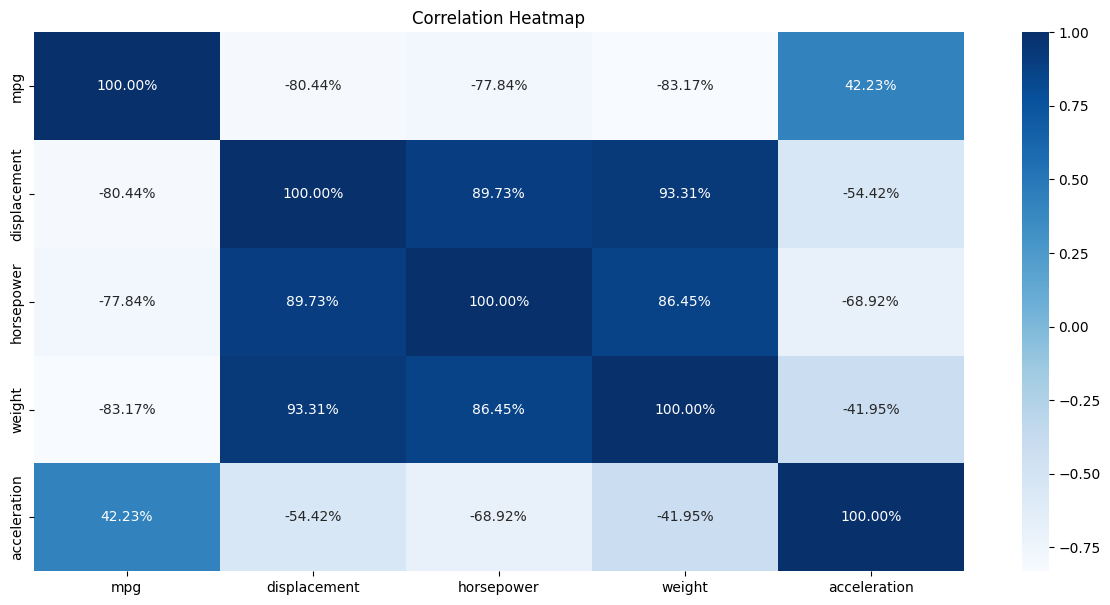

In [40]:
# To visualize it in heatmap for better reading

plt.figure(figsize=(15, 7))
sns.heatmap(df[numeric_variables].corr(numeric_only=True), annot=True, cmap='Blues', fmt=".2%")  # Formatting annotations as percentages
plt.title('Correlation Heatmap')
plt.show()

## A3.
As shown in the correlation matrix and heatmap, the correlation between mpg and weight is -83.17%, indicating a strong negative relationship. This means as the weight of the car increases, its mpg tends to decrease. This is one of the strongest negative correlations in the matrix, highlighting the significant trade-off between the weight of a vehicle and its fuel efficiency.

## Q4. Use `statsmodels` to regress mpg on all other variables. Note you can tell `ols()` to treat a variable as categorical by enclosing the variable in `C()`. (10 points) **(15 points total)**
  1. Interpret the significant effects. (5 points)
  1. Which variables don't have a significant effect? Provide potential explanation for one surprising non-effect. (5 points)
  1. Discuss the difference in results when you treat `year` as a categorical vs a numeric variable. (5 points)

In [41]:
# Treating year as categorical

mpg_model_c = smf.ols('mpg ~ displacement + horsepower + weight + acceleration + C(cylinders) + C(year) + C(origin)', data=df).fit()

print(mpg_model_c.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     116.8
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          2.64e-151
Time:                        01:22:28   Log-Likelihood:                -954.59
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     369   BIC:                             2047.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.9168      2.36

In [42]:
# Treating year as numeric

mpg_model_n = smf.ols('mpg ~ displacement + horsepower + weight + acceleration + year + C(cylinders) + C(origin)', data=df).fit()

print(mpg_model_n.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     191.1
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          2.39e-147
Time:                        01:22:28   Log-Likelihood:                -993.35
No. Observations:                 392   AIC:                             2011.
Df Residuals:                     380   BIC:                             2058.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -22.0801      4.54

## A4.
1.   **Significant Effects:**<br>
        If the p-value is less than 0.05, the variable is considered to have a significant effect.

*   Cars with 4, 5, 6, and 8 cylinders have higher mpg.
*   Cars from years 77 to 82 have significantly higher mpg.
*   Cars of origin 2 and 3 have higher mpg than origin 1.
*   Heavier cars have lower mpg.<br>

2.  **Non-significant Variables:**
*   Displacement doesn't significantly predict mpg.
*   Many horsepower levels don't significantly impact mpg.
*   Acceleration does not show a significant effect on mpg in this model.<br>

3.  **What will happen if we treated Year as Categorical vs Numeric?**
*   Treating year as categorical captures unique year effects.
*   As numeric, it would assume a linear mpg change over years.
*   The categorical treatment captures potential non-linear patterns but adds more parameters.

## Q5. From the above regression model in Q4, include two way interactions between a numeric and categorical variable in three different regression models (three separate models in total). Do any of them appear significant? Discuss the results. **(15 points total)**


In [43]:
# Model 1: Interaction between weight (numeric) and origin (categorical):
model1 = smf.ols('mpg ~ weight * C(origin)', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     188.1
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          1.14e-101
Time:                        01:22:28   Log-Likelihood:                -1136.4
No. Observations:                 397   AIC:                             2285.
Df Residuals:                     391   BIC:                             2309.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                42.98

Observation:<br>
*   `R-squared Value:`<br>
    0.706 or 70.6% of the variance in mpg.
*   `Significant Variables:`<br>
    weight & origin (3) & their interactions with each other were significant predictors.

In [44]:
# Model 2: Interaction between acceleration (numeric) and cylinders (categorical):
model2 = smf.ols('mpg ~ acceleration * C(cylinders)', data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     81.07
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.83e-83
Time:                        01:22:28   Log-Likelihood:                -1169.3
No. Observations:                 397   AIC:                             2359.
Df Residuals:                     387   BIC:                             2398.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Observation:<br>
*   `R-squared Value:`<br>
    0.653 or 65.3% of the variance in mpg.
*   `Significant Variables:`<br>
    No segnificat variables in this model.
*   `Concerns:`<br>
    Adjusted R-squared is lower than R-squared, hinting at potential overfitting.

In [45]:
# Model 3: Interaction between displacement (numeric) and year (categorical):
model3 = smf.ols('mpg ~ displacement * C(year)', data=df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     66.56
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          9.82e-121
Time:                        01:22:28   Log-Likelihood:                -1041.8
No. Observations:                 397   AIC:                             2136.
Df Residuals:                     371   BIC:                             2239.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Observation:<br>
*   `R-squared Value:`<br>
    0.818 or 81.8% of the variance in mpg. Which is the highest among the three
*   `Significant Variables:`<br>
    displacement & the following years (71, 74, 76-82) & their interactions with each other were significant predictors.
*   `Concerns:`<br>
    This model has the highest R-squared value, but has many coefficients, which might make it prone to overfitting. Also, some coefficients are not statistically significant.

## Discussing the Results of 3 models:
The third model is the best at predicting mpg. It uses important information from the first two models and looks deeper into how year and displacement work together.<br>
However, there might be some issues with the data being too closely related, which could be a problem.<br>
Even though it's the most detailed model, we need to be careful when understanding what it tells us.





## Q6. Measure the in-sample and out of sample $R^2$ of the model specified in Q4.1 using 80% data for training and 20% data for testing. **(10 points total)**

In [46]:
train, test = train_test_split(df, test_size = 0.20, random_state=23)

est = smf.ols('mpg ~ displacement + horsepower + weight + acceleration + C(cylinders) + C(year) + C(origin)', df).fit()
print('In sample R-square: {:.4f}'.format(est.rsquared))

predictions = est.predict(test)
print('Out of sample R-square: {:.4f}'.format(r2_score(test.mpg, predictions)))

In sample R-square: 0.8744
Out of sample R-square: 0.8651


## Q7. Collaboration statement **(10 points total)**
Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? Did you use any generative AI tool, such as ChatGPT? If so, provide your prompts.

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you.

If you did not collaborate with anyone simply declare so.

Sample answer:

1. I discussed with Hazel for this homework. I needed her help with submission system and as a sounding board for the reasonableness of this homework.
1. I used ChatGPT with the following prompt to understand how to measure out of sample $R^2$:
> provide prompt here
Then I wrote the code that is submitted in the assignment.
1. I did not discuss with anyone or get any help from any generative AI tool.

*   I had issue with numerical variable being treated as categorical "horsepower". I've discussed this issue with Fahad and he advised me to check its  type and I've found out that it was object and that's why I faced these error. Then I went and changed the  dtype to float, and it's working now.
*   I've used ChatGPT to explain to me how to interpret the 𝑅2 outcome.
*   I've used the code shared in Slack by Boyuan Chen to be able to expert a clean PDF file of the notebook.

In [ ]:
# Code to export notebook to pdf

! jupyter nbconvert --to html /content/Sulaiman_Alhomoud_HW1.ipynb